# Como criar Categorias no Pandas
- youtube:
https://www.youtube.com/watch?v=yjCtRmc4D7Q

- base no kaggle:
https://www.kaggle.com/datasets/jsphyg/tipping



In [2]:
# importando o pandas
import pandas as pd

DADOS = "tips.csv"

df = pd.read_csv(DADOS)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Reconhecendo a base

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
df.describe(exclude='number')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [40]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [21]:
for coluna in df.select_dtypes(include="object"):
    print(f"{coluna}:{df[coluna].unique()}")

sex:['Female' 'Male']
smoker:['No' 'Yes']
day:['Sun' 'Sat' 'Thur' 'Fri']
time:['Dinner' 'Lunch']


<Axes: >

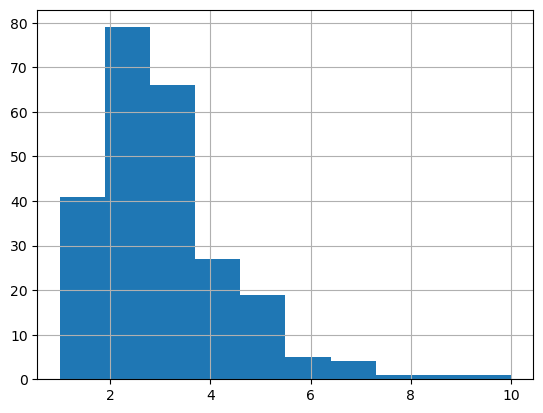

In [23]:
df["tip"].hist()

In [27]:
df['tip'].value_counts(bins=10)

(1.9, 2.8]     79
(2.8, 3.7]     66
(0.99, 1.9]    41
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: count, dtype: int64

In [29]:
df['tip'].value_counts(bins=10).sort_index()

(0.99, 1.9]    41
(1.9, 2.8]     79
(2.8, 3.7]     66
(3.7, 4.6]     27
(4.6, 5.5]     19
(5.5, 6.4]      5
(6.4, 7.3]      4
(7.3, 8.2]      1
(8.2, 9.1]      1
(9.1, 10.0]     1
Name: count, dtype: int64

## Pandas Cut

In [34]:
# (0,2],(2,5],(5,inf]

faixas = [0,2,5,float('inf')]
categorias = ['baixo','medio', 'alto']

df['categoria_tip'] = pd.cut(df["tip"], bins=faixas, labels=categorias)
df.head()
                      

,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [36]:
df['categoria_tip'].value_counts()

categoria_tip
medio    148
baixo     78
alto      18
Name: count, dtype: int64

In [42]:
df['categoria_tip'].value_counts(normalize=True)

categoria_tip
medio    0.606557
baixo    0.319672
alto     0.073770
Name: proportion, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    object  
 3   smoker         244 non-null    object  
 4   day            244 non-null    object  
 5   time           244 non-null    object  
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 13.8+ KB


In [46]:
df['categoria_tip']

0      baixo
1      baixo
2      medio
3      medio
4      medio
       ...  
239     alto
240    baixo
241    baixo
242    baixo
243    medio
Name: categoria_tip, Length: 244, dtype: category
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [48]:
df['categoria_tip'].cat.categories

Index(['baixo', 'medio', 'alto'], dtype='object')

In [52]:
df['categoria_tip'].unique()

['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']

In [54]:
df['categoria_tip'].cat.ordered

True

In [56]:
df['categoria_tip'].cat.codes

0      0
1      0
2      1
3      1
4      1
      ..
239    2
240    0
241    0
242    0
243    1
Length: 244, dtype: int8

## Criando categorias em outras colunas

In [62]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'categoria_tip'],
      dtype='object')

In [66]:
colunas_categoricas = ["sex", "smoker", "day", "time" ]

df_categorizado = df.copy()

for coluna in colunas_categoricas:
    df_categorizado[coluna] = df_categorizado[coluna].astype("category")

df_categorizado.head()

,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [68]:
df_categorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    category
 3   smoker         244 non-null    category
 4   day            244 non-null    category
 5   time           244 non-null    category
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.7 KB


In [82]:
for coluna in df_categorizado.select_dtypes(include="category"):
    print(f"{coluna}: {df_categorizado[coluna].unique()}")
    print(f"{coluna}.cat.categories: {df_categorizado[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {df_categorizado[coluna].cat.ordered}")
    print()

sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
sex.cat.categories: Index(['Female', 'Male'], dtype='object')
sex.cat.ordered: False

smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
smoker.cat.categories: Index(['No', 'Yes'], dtype='object')
smoker.cat.ordered: False

day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']
day.cat.categories: Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')
day.cat.ordered: False

time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
time.cat.categories: Index(['Dinner', 'Lunch'], dtype='object')
time.cat.ordered: False

categoria_tip: ['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']
categoria_tip.cat.categories: Index(['baixo', 'medio', 'alto'], dtype='object')
categoria_tip.cat.ordered: True



## Categorias ordenadas

In [85]:
df_categorizado["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [87]:
df_categorizado["day"].value_counts().sort_index()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: count, dtype: int64

In [89]:
# ele automaticamente categorizou em ordem alfabetica, assim que reconheceu que é texto

# veremos adiante como corrigir esse ordenamento

<Axes: xlabel='day'>

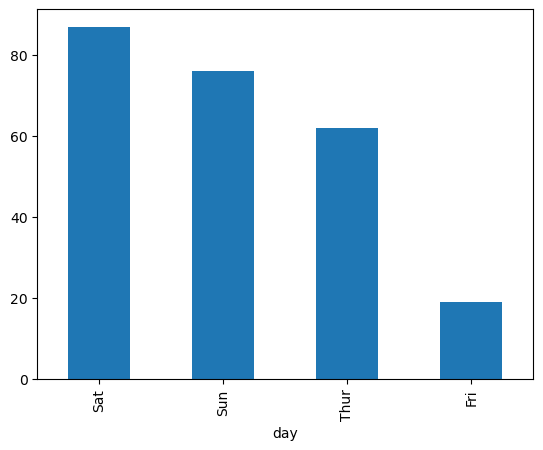

In [91]:
df_categorizado["day"].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

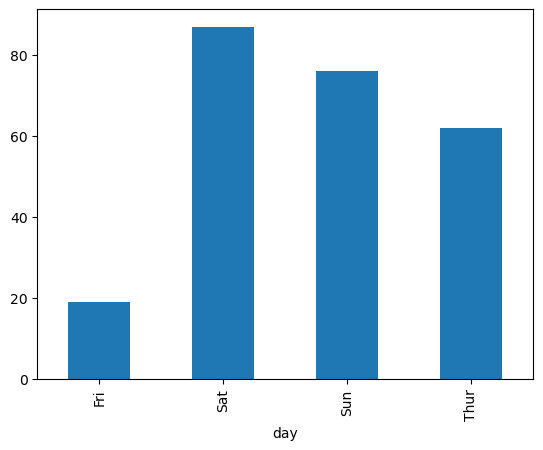

In [97]:
df_categorizado["day"].value_counts().sort_index().plot(kind='bar')

In [105]:
dias_da_semana = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
df_categorizado["day"] = df_categorizado["day"].cat.set_categories(dias_da_semana, ordered=True)
df_categorizado.head()


,total_bill,tip,sex,smoker,day,time,size,categoria_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,baixo
1,10.34,1.66,Male,No,Sun,Dinner,3,baixo
2,21.01,3.50,Male,No,Sun,Dinner,3,medio
3,23.68,3.31,Male,No,Sun,Dinner,2,medio
4,24.59,3.61,Female,No,Sun,Dinner,4,medio


In [107]:
df_categorizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   total_bill     244 non-null    float64 
 1   tip            244 non-null    float64 
 2   sex            244 non-null    category
 3   smoker         244 non-null    category
 4   day            244 non-null    category
 5   time           244 non-null    category
 6   size           244 non-null    int64   
 7   categoria_tip  244 non-null    category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.9 KB


In [109]:
df_categorizado["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Mon      0
Tue      0
Wed      0
Name: count, dtype: int64

In [111]:
df_categorizado["day"].value_counts().sort_index()

day
Mon      0
Tue      0
Wed      0
Thur    62
Fri     19
Sat     87
Sun     76
Name: count, dtype: int64

<Axes: xlabel='day'>

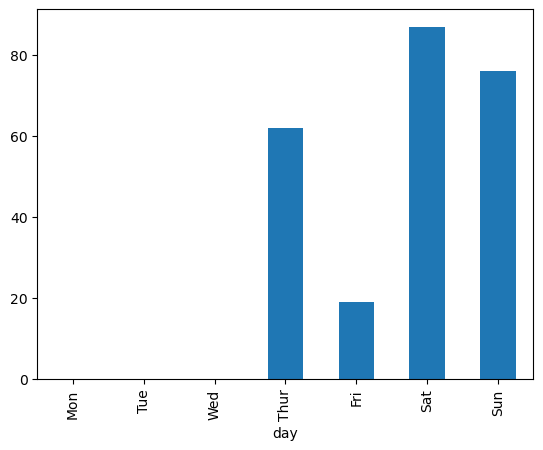

In [113]:
df_categorizado["day"].value_counts().sort_index().plot(kind='bar')

In [115]:
for coluna in df_categorizado.select_dtypes(include="category"):
    print(f"{coluna}: {df_categorizado[coluna].unique()}")
    print(f"{coluna}.cat.categories: {df_categorizado[coluna].cat.categories}")
    print(f"{coluna}.cat.ordered: {df_categorizado[coluna].cat.ordered}")
    print()

sex: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
sex.cat.categories: Index(['Female', 'Male'], dtype='object')
sex.cat.ordered: False

smoker: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
smoker.cat.categories: Index(['No', 'Yes'], dtype='object')
smoker.cat.ordered: False

day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thur' < 'Fri' < 'Sat' < 'Sun']
day.cat.categories: Index(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], dtype='object')
day.cat.ordered: True

time: ['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
time.cat.categories: Index(['Dinner', 'Lunch'], dtype='object')
time.cat.ordered: False

categoria_tip: ['baixo', 'medio', 'alto']
Categories (3, object): ['baixo' < 'medio' < 'alto']
categoria_tip.cat.categories: Index(['baixo', 'medio', 'alto'], dtype='object')
categoria_tip.cat.ordered: True



In [ ]:
# bins distribui por faixas
# pandas cut gera categorias
# pode ser ordenado ou não
# economia de memoria e processamento
# a ordem pode ser alterada posteriormente a criação da categoria
